In [20]:
import pandas as pd 
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve

In [10]:
df = pd.read_csv('classification.csv')
target = df.iloc[:, 0]
predict = df.iloc[:, 1]
"""
Find matrix of TF, TP, TN, FN
"""


def find_metrics(target: pd.DataFrame, predict: pd.DataFrame) -> tuple:
    """
    target - истинные ответы классов
    predict - ответы модели
    возвращает кортеж (TP, FP, TN, FN)
    """
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(target)):
        if target[i] == 1 and predict[i] == 1:
            TP += 1
        elif target[i] == 0 and predict[i] == 0:
            TN += 1
        elif target[i] == 0 and predict[i] == 1:
            FP += 1
        else:
            FN += 1
    return (TP, FP, FN, TN)


metrics = find_metrics(target, predict)


def find_APRF(TP: int, FP: int, FN: int, TN: int) -> tuple:
    """
    TP - верные срабатывания
    FP - ложные срабатывания
    FN - ложные пропуски
    TN - верные пропуски
    возвращает кортеж (accuracy, precision, recall, Fmetric)
    """
    acc = (TP + TN) / (TP + FP + FN + TN)
    accuracy = np.round(acc, decimals=2)

    prec = TP / (TP + FP)
    precision = np.round(prec, decimals=2)

    rec = TP / (TP + FN)
    recall = np.round(rec, decimals=2)

    F = (2*prec*rec)/(prec + rec)
    Fmetric = np.round(F, decimals=2)

    return (accuracy, precision, recall, Fmetric)


with open('w3s4.txt', 'w') as fhand:
    fhand.write(" ".join([str(x) for x in metrics]))

APRF = find_APRF(*metrics)
with open('w3s5.txt', 'w') as fhand:
    fhand.write(" ".join([str(x) for x in APRF]))

In [19]:
"""
Classificator inspectations
"""
df_clf = pd.read_csv('scores.csv')
target_clf = df_clf.iloc[:, 0]
logreg_clf = df_clf.iloc[:, 1]
svm_clf = df_clf.iloc[:, 2]
knn_clf = df_clf.iloc[:, 3]
tree_clf = df_clf.iloc[:, 4]

list_clfs = [logreg_clf, svm_clf, knn_clf, tree_clf]
auc_roc_values = []
for clf in list_clfs:
    auc_roc_values.append( (roc_auc_score(target_clf, clf), clf.name))
auc_roc_values.sort()
max_auc_roc_pair = auc_roc_values[-1]

with open('w3s6.txt', 'w') as fhand:
    fhand.write(max_auc_roc_pair[-1])
    

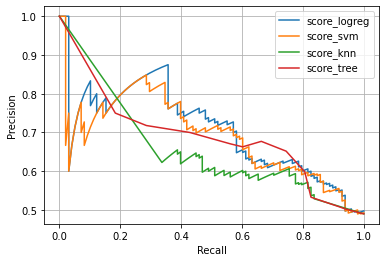

In [26]:
import matplotlib.pyplot as plt
for clf in list_clfs:
    prec, rec, tr = precision_recall_curve(target_clf, clf)
    plt.plot(rec, prec, label=clf.name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
clf_max_val = []
for clf in list_clfs:
    prec, rec, tr = precision_recall_curve(target_clf, clf)
    clf_max_val.append((prec[rec >= 0.7].max(), clf.name))

clf_max_val.sort()
best_clf = clf_max_val[-1][-1]
with open("w3s7.txt", "w") as fhand:
    fhand.write(best_clf)
    